#        Prediction of the selling price of Vehicle using various machine learning models

### This project involves predicting the selling price of a used car using various machine learning models such as linear regression, lasso regression, ridge regression, decision tree and random forest algorithms.  The dataset is obtained from kaggle. 


See link  below for the dataset.


https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho/code


#### What each column represent


- Name: Name of the car
- year: year in which the car was bought
- selling_price: selling price of the car. This will be our target column.
- km_driven: number of kilometers the car is driven
- fuel: fuel type of the car
- seller_type: tells if car is sold by individual or dealer
- transmission: Gear transmission of the car (Automatic/Manual)
- owner: number of previous owners
- mileage: mileage of the car
- engine: engine capacity of the car
- max_power: The brake horse power of the car
- torque: the torque of the car
- seats: the number of seats present in the car


Since this project involved predicting the selling price of a used car, our target column will be the 'selling_price'.

In [291]:
#Importing the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [292]:
vehicle = pd.read_csv('Car_dataset.csv')

In [293]:
#Read the file
vehicle

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [294]:
#Check shape of data
vehicle.shape

(8128, 13)

In [295]:
#Let's check for duplicates and remove if any
vehicle.duplicated().any()

True

In [296]:
#let's drop duplicates
vehicle = vehicle.drop_duplicates()

In [297]:
#Let's check the shape of the data after duplicates has been dropped.
vehicle.shape

(6926, 13)

In [298]:
#Check for sum of nulls in each column.
vehicle.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          208
engine           208
max_power        205
torque           209
seats            208
dtype: int64

In [299]:
#Let's check the percentage of the missing values

(vehicle.isnull().sum()) / (vehicle.shape[0]) * 100

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          3.003176
engine           3.003176
max_power        2.959861
torque           3.017615
seats            3.003176
dtype: float64

Since the number of missing data is only 3%, we will go ahead to drop them

In [300]:
vehicle = vehicle.dropna(axis=0)

In [301]:
#verify if all null values have been removed
vehicle.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

Let's take a look at the features to see which ones we can drop, which to select and which to engineer.

In [302]:
vehicle.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [303]:
vehicle['name'].unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

##### We can perform a feature engineering on the column 'name' by returning only the brand of the car in a  new column 'car brand' and then dropping off the column 'name'.

In [304]:
vehicle['car brand'] = vehicle['name'].str.split().str.get(0)

In [305]:
vehicle = vehicle.drop('name', axis =1)

In [306]:
vehicle.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car brand
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti


###### Let's do another feature engineering. Let us create another column called 'current year' and set it 
###### to 2021 as we would be using this in calculating the age of the car.

In [307]:
vehicle['current year'] = 2021

In [308]:
vehicle.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car brand,current year
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti,2021
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,2021
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,2021
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai,2021
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,2021


In [309]:
#Create a column called 'age of car' and subtract 'year' of the car from the 'current year'.
vehicle['age of car'] = vehicle['current year'] - vehicle['year']

In [310]:
vehicle.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car brand,current year,age of car
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti,2021,7
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,2021,7
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,2021,15
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai,2021,11
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,2021,14


In [311]:
#Since we have calculated the age of the car, it would be reasonable to delete the 'year' and the 'current year' 
#columns now.
vehicle = vehicle.drop('year', axis = 1)

vehicle = vehicle.drop('current year', axis = 1)

In [312]:
vehicle.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car brand,age of car
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti,7
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,7
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,15
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai,11
4,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,14


##### Let's take a look at the fuel column to see what can be made of it.

In [313]:
vehicle['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [314]:
vehicle['fuel'].value_counts(normalize = True)

Diesel    0.544588
Petrol    0.442608
CNG       0.007593
LPG       0.005211
Name: fuel, dtype: float64

In [315]:
vehicle[vehicle['fuel']=='CNG']

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car brand,age of car
35,330000,10000,CNG,Individual,Manual,Second Owner,33.44 km/kg,796 CC,40.3 bhp,60Nm@ 3500rpm,4.0,Maruti,2
203,360000,50000,CNG,Individual,Manual,First Owner,26.6 km/kg,998 CC,58.16 bhp,77Nm@ 3500rpm,5.0,Maruti,5
402,409999,35000,CNG,Individual,Manual,First Owner,20.88 km/kg,1196 CC,61.7 bhp,85Nm@ 3000rpm,5.0,Maruti,1
866,165000,60000,CNG,Individual,Manual,Second Owner,30.46 km/kg,796 CC,47.3 bhp,69Nm@ 3500rpm,5.0,Maruti,9
1225,450000,10000,CNG,Individual,Manual,First Owner,21.94 km/kg,1196 CC,61.7 bhp,85Nm@ 3000rpm,5.0,Maruti,2
1239,370000,140000,CNG,Individual,Manual,First Owner,21.94 km/kg,1196 CC,61.7 bhp,85Nm@ 3000rpm,5.0,Maruti,4
1350,450000,60000,CNG,Individual,Manual,First Owner,21.94 km/kg,1196 CC,61.7 bhp,85Nm@ 3000rpm,5.0,Maruti,2
2312,270000,80000,CNG,Individual,Manual,Second Owner,32.52 km/kg,998 CC,58.33 bhp,78Nm@ 3500rpm,5.0,Maruti,8
2481,300000,50000,CNG,Individual,Manual,Second Owner,26.6 km/kg,998 CC,58.16 bhp,77Nm@ 3500rpm,5.0,Maruti,5
2513,390000,40000,CNG,Individual,Manual,First Owner,26.6 km/kg,998 CC,58.16 bhp,77Nm@ 3500rpm,5.0,Maruti,3


In [316]:
vehicle[vehicle['fuel']=='LPG']

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car brand,age of car
6,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0,Maruti,14
90,225000,44000,LPG,Dealer,Manual,First Owner,26.2 km/kg,998 CC,58.2 bhp,77Nm@ 3500rpm,5.0,Maruti,11
870,231000,70000,LPG,Individual,Manual,First Owner,26.2 km/kg,998 CC,58.2 bhp,77Nm@ 3500rpm,5.0,Maruti,9
1511,300000,100000,LPG,Individual,Manual,Second Owner,26.2 km/kg,998 CC,58.2 bhp,77Nm@ 3500rpm,5.0,Maruti,9
1658,105000,90000,LPG,Individual,Manual,Second Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0,Maruti,14
1907,250000,100000,LPG,Individual,Manual,Second Owner,13.45 km/kg,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0,Hyundai,10
2108,170000,112000,LPG,Individual,Manual,Second Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0,Maruti,13
2166,200000,40000,LPG,Individual,Manual,Fourth & Above Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0,Maruti,11
2484,150000,70000,LPG,Individual,Manual,Third Owner,13.45 km/kg,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0,Hyundai,11
2518,275000,50000,LPG,Individual,Manual,First Owner,26.2 km/kg,998 CC,58.2 bhp,77Nm@ 3500rpm,5.0,Maruti,11


In [317]:
vehicle[vehicle['fuel']=='Diesel']

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car brand,age of car
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti,7
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,7
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai,11
8,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0,Toyota,10
9,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0,Ford,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8112,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0,Ford,3
8113,425000,129000,Diesel,Individual,Manual,First Owner,12.8 kmpl,2494 CC,102 bhp,20.4@ 1400-3400(kgm@ rpm),8.0,Toyota,11
8122,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,219.7Nm@ 1500-2750rpm,5.0,Hyundai,7
8124,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,Hyundai,14


In [318]:
vehicle[vehicle['fuel']=='Petrol']

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car brand,age of car
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,15
4,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,14
5,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0,Hyundai,4
7,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0,Maruti,20
11,92000,100000,Petrol,Individual,Manual,Second Owner,17.3 kmpl,993 CC,60 bhp,78Nm@ 4500rpm,5.0,Maruti,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,380000,25000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,Hyundai,8
8119,360000,80000,Petrol,Individual,Manual,First Owner,20.51 kmpl,998 CC,67.04 bhp,90Nm@ 3500rpm,5.0,Maruti,4
8120,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0,Hyundai,13
8121,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0,Maruti,8


In [319]:
vehicle = vehicle[~vehicle['fuel'].isin(['CNG','LPG'])]

In [320]:
#To verify if 'CNG' and 'LPG' has been filtered out.
vehicle['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

##### Let's take a look at the 'seller_type', 'transmission' and 'owner' columns to see what feature engineering can be done.

In [321]:
vehicle['seller_type'].value_counts(normalize = True)

Individual          0.895642
Dealer              0.100287
Trustmark Dealer    0.004072
Name: seller_type, dtype: float64

In [322]:
vehicle['transmission'].value_counts(normalize = True)

Manual       0.913286
Automatic    0.086714
Name: transmission, dtype: float64

In [323]:
vehicle['owner'].value_counts(normalize = True)

First Owner             0.622229
Second Owner            0.280651
Third Owner             0.073292
Fourth & Above Owner    0.023073
Test Drive Car          0.000754
Name: owner, dtype: float64

In the "seller_type" column, "Trustmark Dealer" also belongs to the "Dealer" category, therefore we will change "Trustmark dealer" to "Dealer".

In [330]:
mapping_dict = {
    "seller_type": {
        "Individual" : "Individual",
         "Dealer" :  "Dealer",
         "Trustmark Dealer": "Dealer"
    }}

In [331]:
vehicle = vehicle.replace(mapping_dict)

Let's verify if we are able to reduce the seller_type category to just "Individual" and "Dealer".

In [332]:
vehicle['seller_type'].value_counts(normalize = True)

Individual    0.895642
Dealer        0.104358
Name: seller_type, dtype: float64

In [333]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6631 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  6631 non-null   int64  
 1   km_driven      6631 non-null   int64  
 2   fuel           6631 non-null   object 
 3   seller_type    6631 non-null   object 
 4   transmission   6631 non-null   object 
 5   owner          6631 non-null   object 
 6   mileage        6631 non-null   object 
 7   engine         6631 non-null   object 
 8   max_power      6631 non-null   object 
 9   torque         6631 non-null   object 
 10  seats          6631 non-null   float64
 11  car brand      6631 non-null   object 
 12  age of car     6631 non-null   int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 725.3+ KB


In [334]:
vehicle.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,car brand,age of car
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti,7
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,7
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,15
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai,11
4,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,14


In [335]:
#Let's drop 'torque' column as this contain info that are rated at different rpm

vehicle = vehicle.drop('torque', axis = 1)

In [336]:
vehicle.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car brand,age of car
0,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,Maruti,7
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,Skoda,7
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,Honda,15
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,Hyundai,11
4,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,Maruti,14


Let's convert mileage, engine, max_power into numerical variables and also remove the strings attached to the variables.

In [337]:

vehicle['mileage'] = vehicle['mileage'].str.rstrip('kmpl').astype('float')

In [338]:
vehicle['engine'] = vehicle['engine'].str.rstrip('CC').astype('float')

In [339]:
vehicle['max_power'] = vehicle['max_power'].str.replace('bhp', "")
vehicle['max_power'] = vehicle['max_power'].astype(float)


In [340]:
vehicle.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car brand,age of car
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti,7
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda,7
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda,15
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai,11
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti,14


In [341]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6631 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  6631 non-null   int64  
 1   km_driven      6631 non-null   int64  
 2   fuel           6631 non-null   object 
 3   seller_type    6631 non-null   object 
 4   transmission   6631 non-null   object 
 5   owner          6631 non-null   object 
 6   mileage        6631 non-null   float64
 7   engine         6631 non-null   float64
 8   max_power      6631 non-null   float64
 9   seats          6631 non-null   float64
 10  car brand      6631 non-null   object 
 11  age of car     6631 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 673.5+ KB


# Let's do some EDA

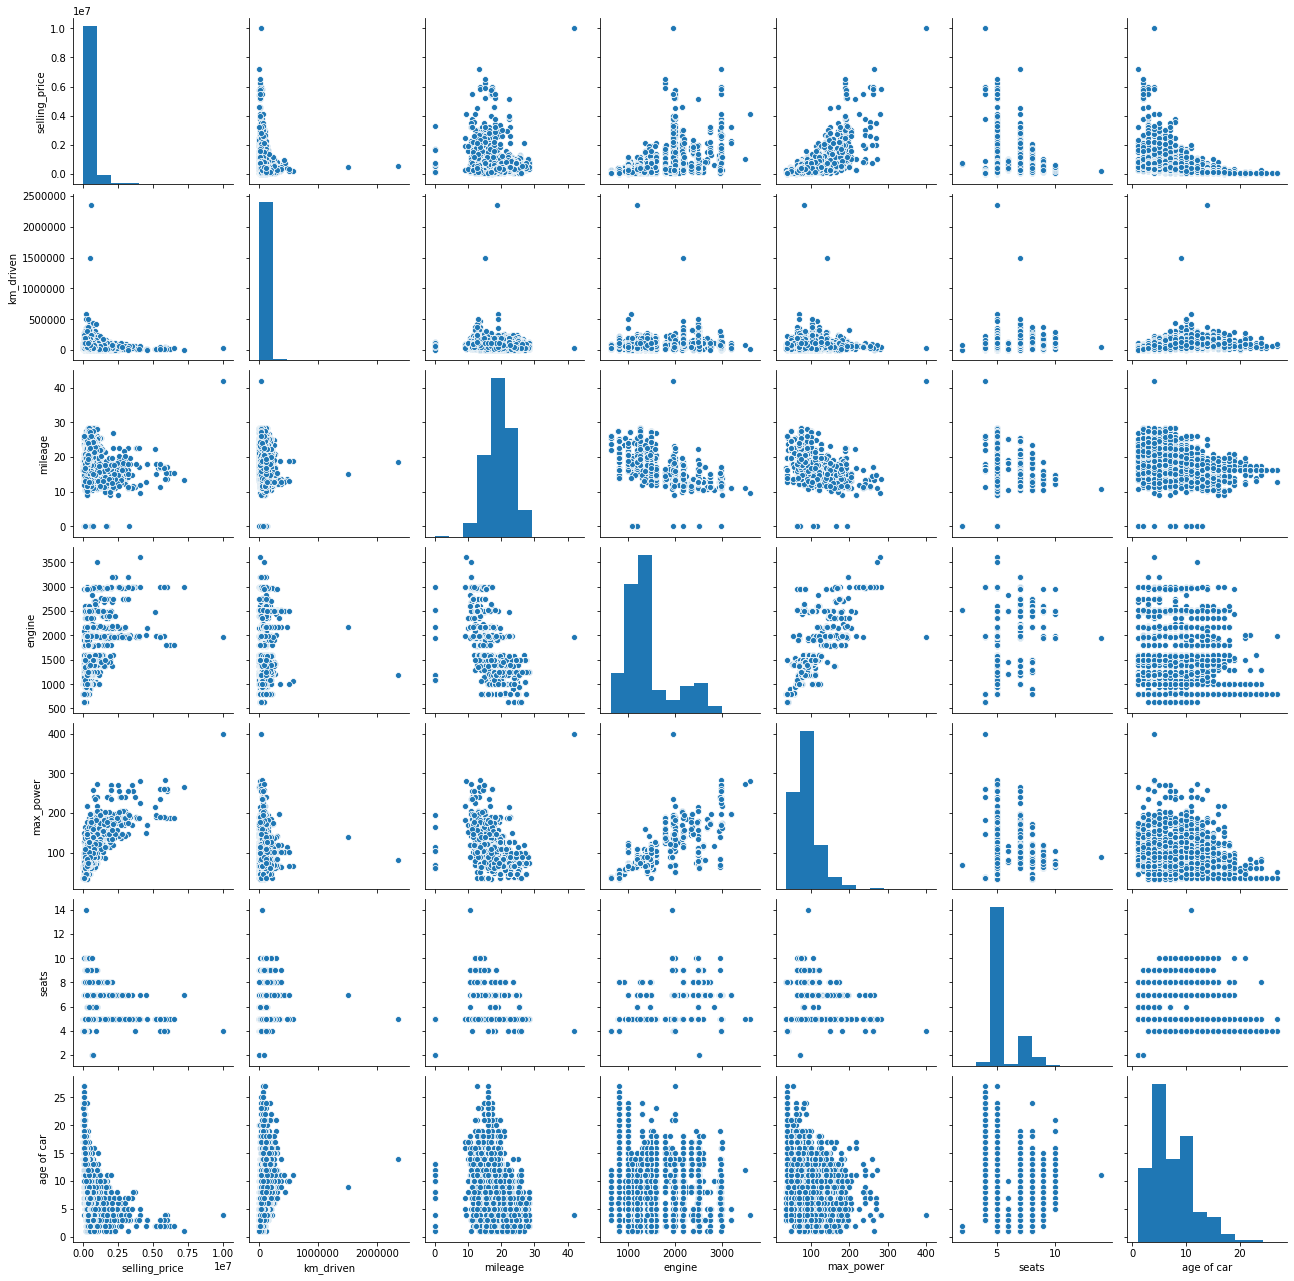

In [342]:
#Let's use pairplot to see the relationship of all numerical columns with the 'selling_price'

sns.pairplot(vehicle)

###### Let's use scatter plots to explore the numerical columns

Text(0, 0.5, 'selling_price')

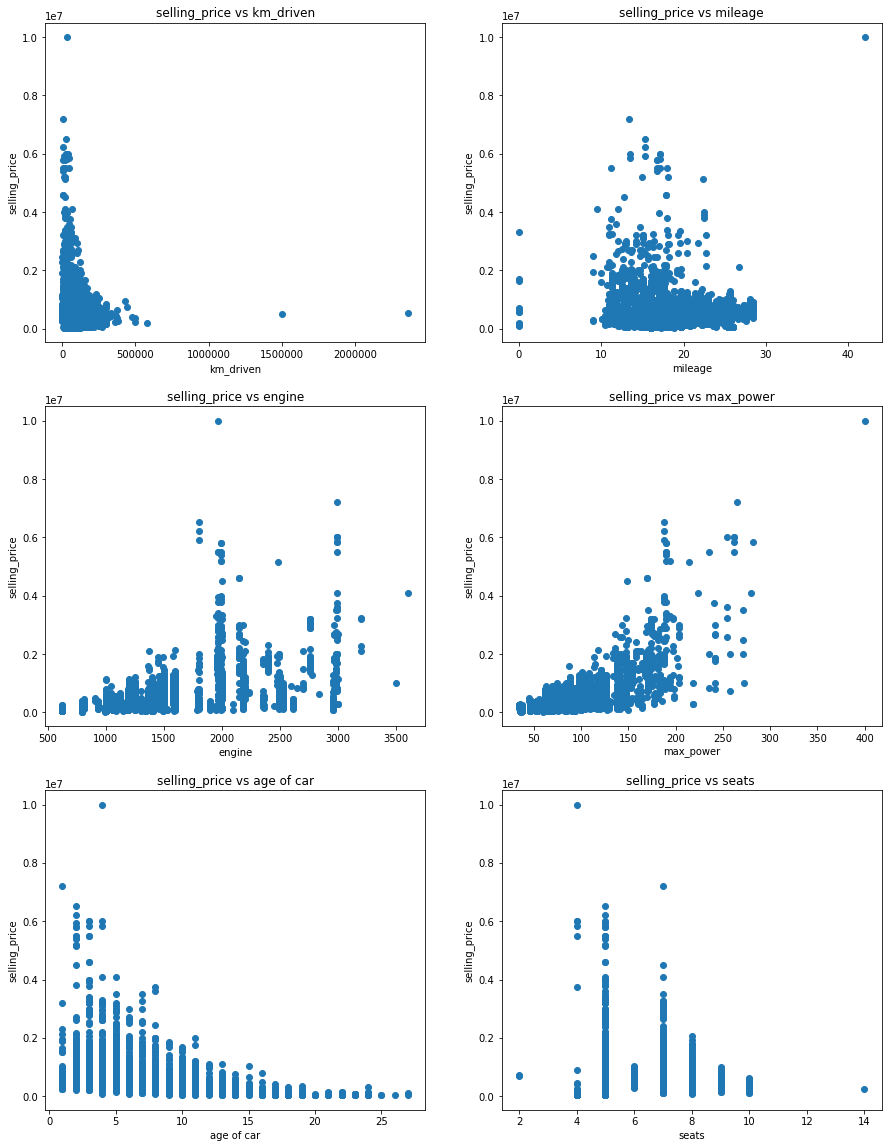

In [343]:
plt.figure(figsize= (15,20))
plt.subplot(3, 2, 1)
plt.scatter(x= vehicle['km_driven'], y= vehicle['selling_price'])
plt.title('selling_price vs km_driven')
plt.xlabel('km_driven')
plt.ylabel('selling_price')


plt.subplot(3, 2, 2)
plt.scatter(x= vehicle['mileage'], y= vehicle['selling_price'])
plt.title('selling_price vs mileage')
plt.xlabel('mileage')
plt.ylabel('selling_price')



plt.subplot(3, 2, 3)
plt.scatter(x= vehicle['engine'], y= vehicle['selling_price'])
plt.title('selling_price vs engine')
plt.xlabel('engine')
plt.ylabel('selling_price')


plt.subplot(3, 2, 4)
plt.scatter(x= vehicle['max_power'], y= vehicle['selling_price'])
plt.title('selling_price vs max_power')
plt.xlabel('max_power')
plt.ylabel('selling_price')


plt.subplot(3, 2, 5)
plt.scatter(x= vehicle['age of car'], y= vehicle['selling_price'])
plt.title('selling_price vs age of car')
plt.xlabel('age of car')
plt.ylabel('selling_price')

plt.subplot(3, 2, 6)
plt.scatter(x= vehicle['seats'], y= vehicle['selling_price'])
plt.title('selling_price vs seats ')
plt.xlabel('seats')
plt.ylabel('selling_price')


##### If we take a good look at the scatter plot above, we observe that there are outliers:
- on the selling price, we have outlier of > 8M Rupees, 
- on the km_driven we have outliers of > 1,000,000 
- on the mileage we have outliers of < 5

##### Let's remove these outliers.

In [344]:
vehicle = vehicle[(vehicle['selling_price'] < 8000000)]

vehicle = vehicle[(vehicle['km_driven'] < 1000000)]

vehicle = vehicle[(vehicle['mileage'] > 5)]

##### Let's take a look at the scatter plot again to see if the outliers have been removed.

Text(0, 0.5, 'selling_price')

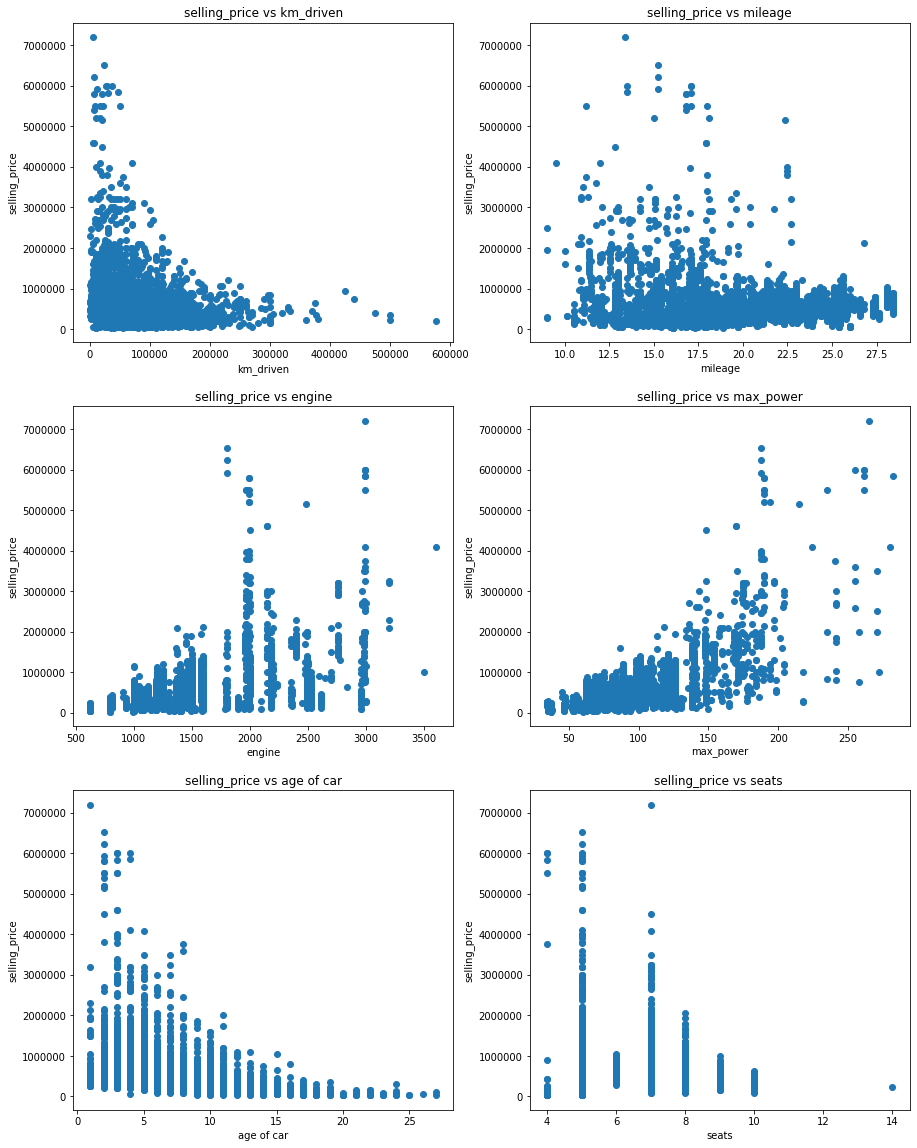

In [345]:
plt.figure(figsize= (15,20))
plt.subplot(3, 2, 1)
plt.scatter(x= vehicle['km_driven'], y= vehicle['selling_price'])
plt.title('selling_price vs km_driven')
plt.xlabel('km_driven')
plt.ylabel('selling_price')


plt.subplot(3, 2, 2)
plt.scatter(x= vehicle['mileage'], y= vehicle['selling_price'])
plt.title('selling_price vs mileage')
plt.xlabel('mileage')
plt.ylabel('selling_price')



plt.subplot(3, 2, 3)
plt.scatter(x= vehicle['engine'], y= vehicle['selling_price'])
plt.title('selling_price vs engine')
plt.xlabel('engine')
plt.ylabel('selling_price')


plt.subplot(3, 2, 4)
plt.scatter(x= vehicle['max_power'], y= vehicle['selling_price'])
plt.title('selling_price vs max_power')
plt.xlabel('max_power')
plt.ylabel('selling_price')


plt.subplot(3, 2, 5)
plt.scatter(x= vehicle['age of car'], y= vehicle['selling_price'])
plt.title('selling_price vs age of car')
plt.xlabel('age of car')
plt.ylabel('selling_price')

plt.subplot(3, 2, 6)
plt.scatter(x= vehicle['seats'], y= vehicle['selling_price'])
plt.title('selling_price vs seats ')
plt.xlabel('seats')
plt.ylabel('selling_price')

##### Let's use count plot to explore the categorical columns

Text(0, 0.5, 'Count')

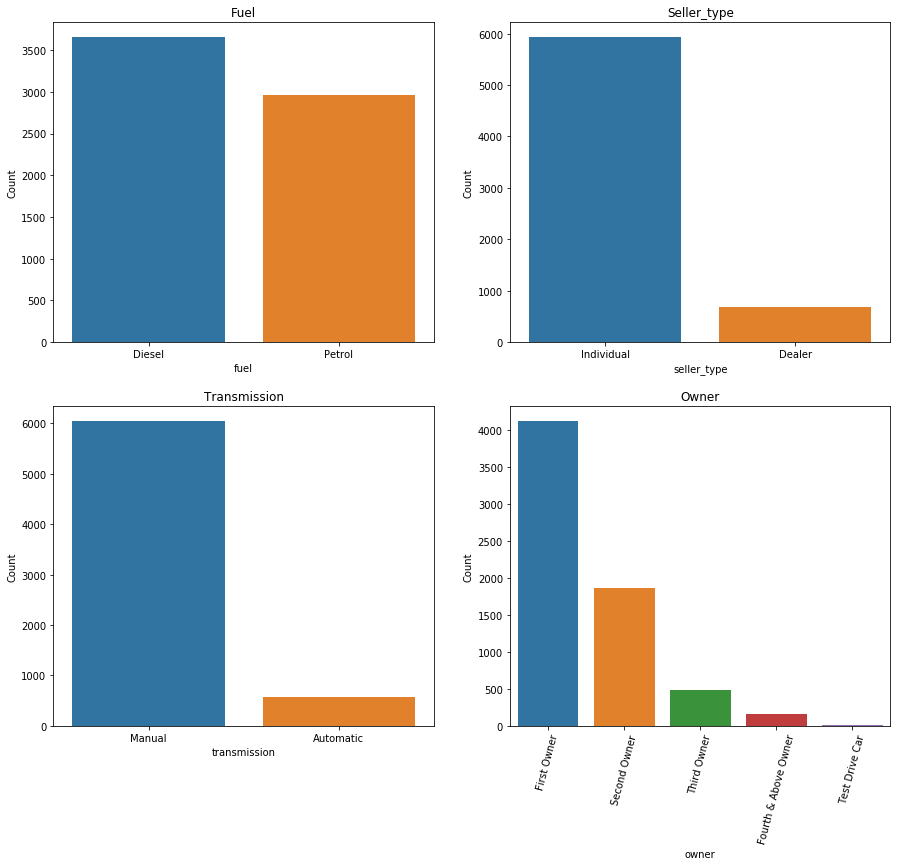

In [346]:
plt.figure(figsize= (15,20))
plt.subplot(3, 2, 1)
sns.countplot(vehicle['fuel'], data=vehicle,)
plt.title('Fuel')
plt.xlabel('fuel')
plt.ylabel('Count')


plt.subplot(3, 2, 2)
sns.countplot(vehicle['seller_type'], data=vehicle,)
plt.title('Seller_type')
plt.xlabel('seller_type')
plt.ylabel('Count')



plt.subplot(3, 2, 3)
sns.countplot(vehicle['transmission'], data=vehicle,)
plt.title('Transmission')
plt.xlabel('transmission')
plt.ylabel('Count')


plt.subplot(3, 2, 4)
sns.countplot(vehicle['owner'], data=vehicle)
plt.xticks(rotation =75)
plt.title('Owner')
plt.xlabel('owner')
plt.ylabel('Count')




###### Let's take a look at the correlation of the numerical columns with the selling price

In [347]:

vehicle.corr()['selling_price'].sort_values()

age of car      -0.437031
km_driven       -0.198285
mileage         -0.127321
seats            0.165776
engine           0.448137
max_power        0.686359
selling_price    1.000000
Name: selling_price, dtype: float64

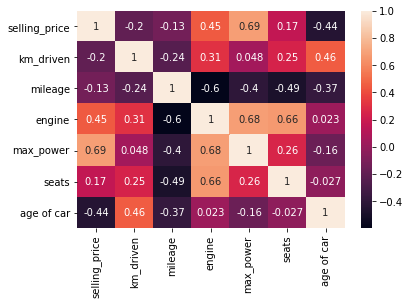

In [348]:
#Let's take a look at multicollinarity among the different features. We will drop one of 2 features that have a 
#correlation >+-0.8.

sns.heatmap(vehicle.corr(), annot=True)

##### These heatmap suggests no multicollinearity. Also, the correlation inspection shows that age of the car shows the highest negative correlation to the car selling price while the max_power (which is the brake horse power) shows the highest positive correlation.

In [349]:
vehicle.columns

Index(['selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'seats', 'car brand',
       'age of car'],
      dtype='object')

In [350]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6613 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  6613 non-null   int64  
 1   km_driven      6613 non-null   int64  
 2   fuel           6613 non-null   object 
 3   seller_type    6613 non-null   object 
 4   transmission   6613 non-null   object 
 5   owner          6613 non-null   object 
 6   mileage        6613 non-null   float64
 7   engine         6613 non-null   float64
 8   max_power      6613 non-null   float64
 9   seats          6613 non-null   float64
 10  car brand      6613 non-null   object 
 11  age of car     6613 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 991.6+ KB


In [351]:
vehicle['owner'].value_counts()

First Owner             4114
Second Owner            1857
Third Owner              485
Fourth & Above Owner     152
Test Drive Car             5
Name: owner, dtype: int64

##### Since we have fuel, seller_type, transmission, owner, and car brand to be categorical which are not good for regression modelling, we will use a get_dummies to hot encode them for use in our models.

In [352]:
vehicle = pd.get_dummies(vehicle,drop_first=True )

vehicle.head()

,selling_price,km_driven,mileage,engine,max_power,seats,age of car,fuel_Petrol,seller_type_Individual,transmission_Manual,...,car brand_Mercedes-Benz,car brand_Mitsubishi,car brand_Nissan,car brand_Opel,car brand_Renault,car brand_Skoda,car brand_Tata,car brand_Toyota,car brand_Volkswagen,car brand_Volvo
0,450000,145500,23.40,1248.0,74.00,5.0,7,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,370000,120000,21.14,1498.0,103.52,5.0,7,0,1,1,...,0,0,0,0,0,1,0,0,0,0
2,158000,140000,17.70,1497.0,78.00,5.0,15,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,225000,127000,23.00,1396.0,90.00,5.0,11,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,130000,120000,16.10,1298.0,88.20,5.0,14,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [353]:
vehicle.shape

(6613, 44)

##### Now let us assign features, target column and perform a train_test_split

In [354]:
X = vehicle.drop('selling_price', axis = 1)

y = vehicle['selling_price']

In [355]:
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [356]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

###### Now Let's perform a linear regression

In [357]:
from sklearn.linear_model import LinearRegression



In [358]:
lr_regression = LinearRegression()
lr_regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [359]:
#make predictions on the X_train
y_train_pred = lr_regression.predict(X_train)

In [360]:
r2_train_linear = metrics.r2_score(y_train, y_train_pred)

In [361]:
r2_train_linear

0.7570090101830642

In [362]:
#make predictions on the X_test
y_test_pred = lr_regression.predict(X_test)

In [363]:
r2_test_linear = metrics.r2_score(y_test, y_test_pred)

In [364]:
r2_test_linear

0.7339564356942553

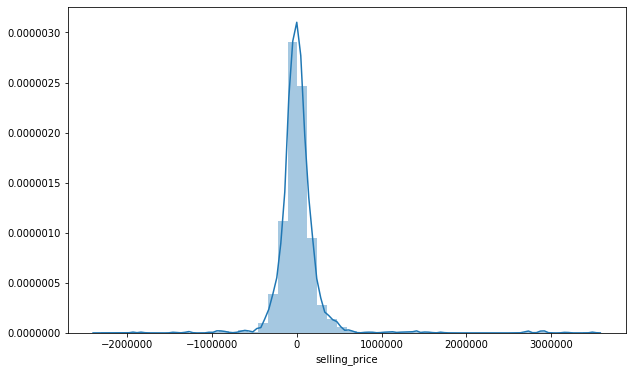

In [365]:
plt.figure(figsize=(10,6))
sns.distplot(y_test - y_test_pred)

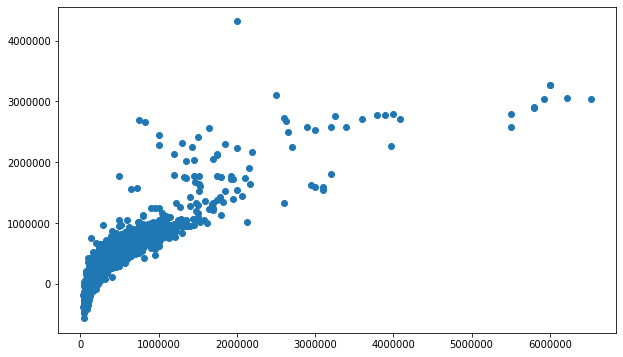

In [366]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_test_pred)

This distribution looks like a normal distribution which shows we have created a good model. 
However, we can explore other models to see if we can create more accurate models as the the R^2 value is not high enough.

##### Let's try using a cross validation technique

In [367]:
from sklearn.model_selection import cross_val_score

lr_cv = cross_val_score(lr_regression, X, y, cv =10)


In [368]:
lr_cv_mean = np.mean(lr_cv)

print(lr_cv_mean)

0.7071411735122805


The score for the cross validation is also not great. Therefore, let's perform an hyper parameter tuning using ridge and lasso regression.

##### Let's perform a linear ridge regression

In [369]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [370]:
L_ridge = Ridge()
params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
L_ridge_regression=GridSearchCV(L_ridge,param_grid = params,cv=10)
L_ridge_regression.fit(X,y)

C:\Users\Yhemmy\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.97652e-29): result may not be accurate.
  overwrite_a=True).T
C:\Users\Yhemmy\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.08275e-29): result may not be accurate.
  overwrite_a=True).T
C:\Users\Yhemmy\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.97652e-24): result may not be accurate.
  overwrite_a=True).T
C:\Users\Yhemmy\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.08275e-24): result may not be accurate.
  overwrite_a=True).T
C:\Users\Yhemmy\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.97652e-22): result may not be accurate.
  overwrite_a=True).T
C:\Users\Yhemmy\anaconda3\lib\site-packages\sklearn\lin

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [372]:
#Let's check the best alpha chosen and our best score
print(L_ridge_regression.best_params_)
print(L_ridge_regression.best_score_)

{'alpha': 5}
0.715531066485064


##### Let's perform a lasso regression

In [373]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
param={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regression=GridSearchCV(lasso,param_grid=param,cv=10)

lasso_regression.fit(X,y)


C:\Users\Yhemmy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 166233362265304.16, tolerance: 135491753725.99321
  positive)
C:\Users\Yhemmy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191283924733954.88, tolerance: 161184167757.4215
  positive)
C:\Users\Yhemmy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 186251182115715.38, tolerance: 158257798403.55957
  positive)
C:\Users\Yhemmy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. 

C:\Users\Yhemmy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 186251206401842.6, tolerance: 158257798403.55957
  positive)
C:\Users\Yhemmy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 182332361673322.6, tolerance: 158308257501.3835
  positive)
C:\Users\Yhemmy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191811540727171.53, tolerance: 164642350310.43634
  positive)
C:\Users\Yhemmy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Du

C:\Users\Yhemmy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191407083218837.75, tolerance: 164642350310.43634
  positive)
C:\Users\Yhemmy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177566527669664.5, tolerance: 152798514640.67184
  positive)
C:\Users\Yhemmy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177539596276723.8, tolerance: 151049684486.54285
  positive)
C:\Users\Yhemmy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

C:\Users\Yhemmy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147235340555014.4, tolerance: 151049684486.54285
  positive)
C:\Users\Yhemmy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 181846151609093.75, tolerance: 160512042910.24246
  positive)
C:\Users\Yhemmy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159300483267422.0, tolerance: 153159006960.4999
  positive)
C:\Users\Yhemmy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Du

C:\Users\Yhemmy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 171620594944788.8, tolerance: 161184167757.4215
  positive)
C:\Users\Yhemmy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 182052860159126.5, tolerance: 158257798403.55957
  positive)
C:\Users\Yhemmy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 179742920338412.75, tolerance: 158308257501.3835
  positive)
C:\Users\Yhemmy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [374]:
#Let's check the best alpha chosen and our best score
print(lasso_regression.best_params_)
print(lasso_regression.best_score_)

{'alpha': 40}
0.7073798356620092


##### Model Evaluation for Ridge and Lasso

In [375]:

ridge_pred=L_ridge_regression.predict(X_test)
lasso_pred=lasso_regression.predict(X_test)

r2_test_ridge = metrics.r2_score(y_test, ridge_pred)
r2_test_lasso = metrics.r2_score(y_test, lasso_pred)

print("Rsquared for Ridge:", r2_test_ridge)
print("Rsquared for Lasso:", r2_test_lasso)

Rsquared for Ridge: 0.7623194189130107
Rsquared for Lasso: 0.7892499379418847


Text(0, 0.5, 'ridge_pred')

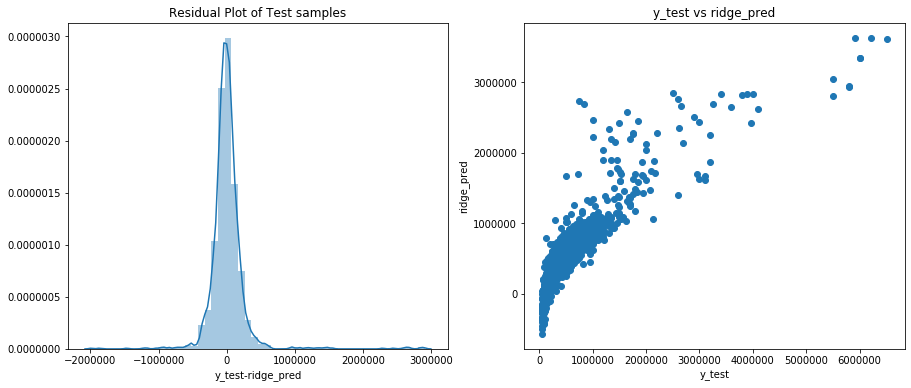

In [376]:
#Distribution plot for test data for Ridge regression.
    
#Distribution plot for test data.
fig, ax = plt.subplots(1,2,figsize = (15,6))
ax[0].set_title('Residual Plot of Test samples')
sns.distplot((y_test-ridge_pred),hist = True,ax = ax[0])
ax[0].set_xlabel('y_test-ridge_pred') 
    
     
# y_test vs y_pred_test scatter plot for Ridge regression
ax[1].set_title('y_test vs ridge_pred')
ax[1].scatter(x = y_test, y = ridge_pred)
ax[1].set_xlabel('y_test')
ax[1].set_ylabel('ridge_pred')
       

Text(0, 0.5, 'lasso_pred')

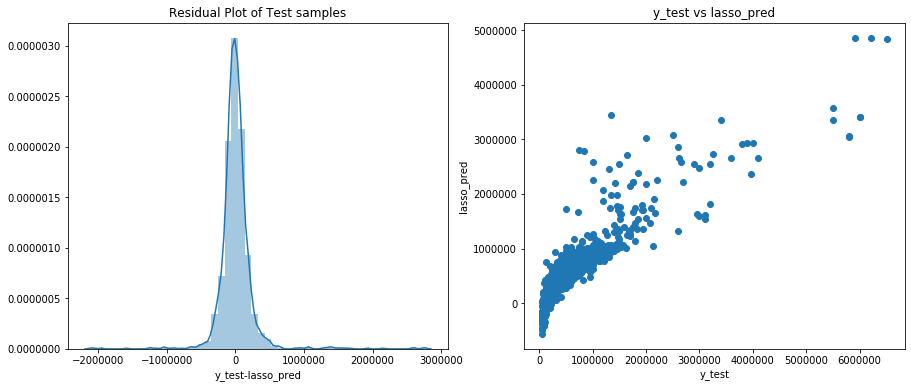

In [377]:
#Distribution plot for test data for Lasso regression.
    
#Distribution plot for test data.
fig, ax = plt.subplots(1,2,figsize = (15,6))
ax[0].set_title('Residual Plot of Test samples')
sns.distplot((y_test-lasso_pred),hist = True,ax = ax[0])
ax[0].set_xlabel('y_test-lasso_pred') 
    
     
# y_test vs y_pred_test scatter plot for Lasso regression
ax[1].set_title('y_test vs lasso_pred')
ax[1].scatter(x = y_test, y = lasso_pred)
ax[1].set_xlabel('y_test')
ax[1].set_ylabel('lasso_pred')
       

The R^2 obtained for ridge and lasso also doesn't look great. Let's explore other algorithms

##### Let's use a decision tree

In [378]:
from sklearn.tree import DecisionTreeRegressor

In [379]:
dtree = DecisionTreeRegressor()

In [380]:
dtree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [381]:
y_train_pred = dtree.predict(X_train)

In [382]:
print("Coefficient of determination R^2 <-- on train set: {}".format(metrics.r2_score(y_train,y_train_pred)))

Coefficient of determination R^2 <-- on train set: 0.9991090201732026


In [383]:
y_test_pred = dtree.predict(X_test)

In [384]:
print("Coefficient of determination R^2 <-- on test set: {}".format(metrics.r2_score(y_test,y_test_pred)))

Coefficient of determination R^2 <-- on test set: 0.8284112435089129


If we compare the result of the train and test of R^2, we can tell that we are having a case of overfitting.

##### Let's us try use cross validation

In [385]:
dtree_cv = cross_val_score(dtree, X, y, cv =10)

In [386]:
dtree_cv_mean = np.mean(dtree_cv)

print(dtree_cv_mean)

0.8398676583090472


The cross_val_score looks like a more generalize model.

##### Let's do some hyper parameter tuning of the decision tree regressor

In [387]:
## Hyperparameter optimization using GridSearchCV

params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5,6,7,8,9,10 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}



In [388]:
from sklearn.model_selection import GridSearchCV

In [389]:
grid_search_dree=GridSearchCV(dtree,param_grid=params,n_jobs=-1,cv=10,verbose=3)

In [390]:
grid_search_dree.fit(X,y)

Fitting 10 folds for each of 20480 candidates, totalling 204800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1808 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 5392 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 10000 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 15632 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 22288 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 29968 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 38672 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 48400 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 59152 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done 70928 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 83728 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 97552 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 112400 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 12

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                

In [391]:
grid_search_dree.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [392]:
grid_search_dree.best_score_

0.40499173966265173

In [393]:
y_train_dtree_predict=grid_search_dree.predict(X_train)

In [394]:
print("Coefficient of determination R^2 <-- on train set: {}".format(metrics.r2_score(y_train,y_train_dtree_predict)))

Coefficient of determination R^2 <-- on train set: 0.4150256358273565


In [395]:
y_test_dtree_predict=grid_search_dree.predict(X_test)

In [396]:
print("Coefficient of determination R^2 <-- on test set: {}".format(metrics.r2_score(y_test,y_test_dtree_predict)))

Coefficient of determination R^2 <-- on test set: 0.4007459970099596


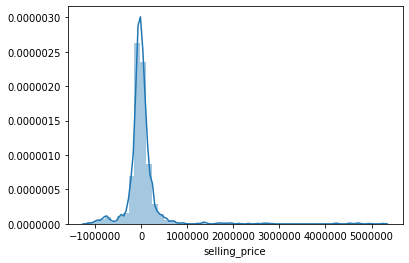

In [397]:
#Check the distribution of the residual
sns.distplot(y_test-y_test_dtree_predict)

##### Let's also try Random Forest with RandomizedSearchCV
The reason RandomSearchCV is used is to help with hyperparameter optimization.

In [398]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [399]:
rfr = RandomForestRegressor()

In [400]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [401]:
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [402]:
rf_searchcv = RandomizedSearchCV(estimator = rfr, param_distributions = param_grid, cv = 10, verbose=1, random_state = 101)

In [403]:
rf_searchcv.fit(X,y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  7.6min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [404]:


rf_searchcv.best_params_


{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 15}

In [405]:
rf_searchcv.best_score_

0.9018386348801097

In [407]:
#Let's perform a prediction on the X-train
y_train_RandomForest_pred = rf_searchcv.predict(X_train)

r2_train_RandomForest = metrics.r2_score(y_train, y_train_RandomForest_pred)
print("Rsquared for r2_train_RandomForest:", r2_train_RandomForest)

Rsquared for r2_train_RandomForest: 0.9759027751169095


In [408]:
RandomForest_pred = rf_searchcv.predict(X_test)


r2_test_RandomForest = metrics.r2_score(y_test, RandomForest_pred)


print("Rsquared for r2_test_RandomForest:", r2_test_RandomForest)

Rsquared for r2_test_RandomForest: 0.9835444062450757


Text(0, 0.5, 'RandomForest_pred')

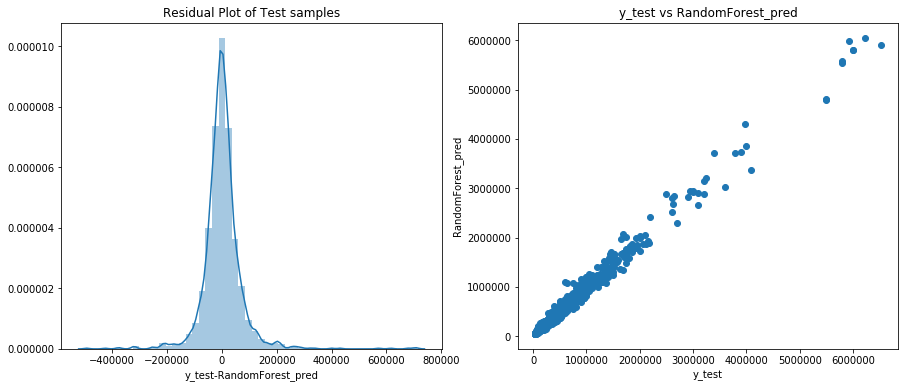

In [409]:
#Distribution plot for test data for Decision Tree.
    
#Distribution plot for test data.
fig, ax = plt.subplots(1,2,figsize = (15,6))
ax[0].set_title('Residual Plot of Test samples')
sns.distplot((y_test-RandomForest_pred),hist = True,ax = ax[0])
ax[0].set_xlabel('y_test-RandomForest_pred') 
    
     
# y_test vs y_pred_test scatter plot for Decision Tree
ax[1].set_title('y_test vs RandomForest_pred')
ax[1].scatter(x = y_test, y = RandomForest_pred)
ax[1].set_xlabel('y_test')
ax[1].set_ylabel('RandomForest_pred')
       

##### Conclusion

Random Forest Regression with hyperparameter tuning gave the best result as can be seen in the R-squared values. It shows a more generalized results. Therefore, I recommend it to predict the selling price of a vehicle based on this dataset. 